### Data Analysis and Visualization
CA1 Index Generation and Visualization
Matthew Riddell - D00245674

### 1. Theoretical Framework

I wish to create a Country Healthy Index (CDI) to show which countries are the healthiest based on the following dimensions

Temp....

### Dimensions

<ul>
<li>Longevity</li>	
<li>Access to Care</li>	
<li>Health Outcomes</li>	
<li>Financial Risk</li>	
<li>Environmental Factors</li>		   
</ul>







### References:

World Data 2023, Kaggle Dataset
https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023





### 2. Data Selection

For the development of the Country Healthy Index, the following variables from the dataset will be used:

<ul>
<li>Life expectancy</li>
<li>Physicians per thousand</li>
<li>Infant mortality</li>	
<li>Maternal mortality ratio</li>	
<li>Out of pocket health expenditure</li>	
<li>Co2-Emissions</li>
</ul>

Importing Dataset:

In [44]:
import pandas as pd

# loading dataset
file_path = "world-data-2023.csv"
df = pd.read_csv(file_path)

# printing the columns from the dataset
print("Available Columns:\n", df.columns.tolist())

# selection of relevant indicators for the Country Healthy Index (CHI)
selected_columns = [
    'Country',
    'Life expectancy',
    'Physicians per thousand',
    'Infant mortality',
    'Maternal mortality ratio',
    'Out of pocket health expenditure',
    'Co2-Emissions'
]

# Rename variables for convenience 
df_selected = df_selected.rename(columns={
    'Life expectancy': 'life_expectancy',
    'Physicians per thousand': 'physicians_per_thousand',
    'Infant mortality': 'infant_mortality',
    'Maternal mortality ratio': 'maternal_mortality_ratio',
    'Out of pocket health expenditure': 'out_of_pocket_expenditure',
    'Co2-Emissions': 'co2_emissions'
})

# View the first few rows of the selected data
df_selected.head()


Available Columns:
 ['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Largest city', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Official language', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


,Country,life_expectancy,physicians_per_thousand,infant_mortality,maternal_mortality_ratio,out_of_pocket_expenditure,co2_emissions
0,Afghanistan,64.500000,0.28,47.9,638.000000,78.4,8672.0
1,Albania,78.500000,1.20,7.8,15.000000,56.9,4536.0
2,Algeria,76.700000,1.72,20.1,112.000000,28.1,150006.0
3,Andorra,72.279679,3.33,2.7,160.392265,36.4,469.0
4,Angola,60.800000,0.21,51.6,241.000000,33.4,34693.0


### 3. Imputation of Missing Data

Checking selected variables for missing data

In [46]:
missing_values = df_selected.isnull().sum()
print(missing_values)

# handle numerical strings and convert to floats
df_selected['out_of_pocket_expenditure'] = (
    df_selected['out_of_pocket_expenditure']
    .str.rstrip('%')     
    .astype(float)        
)

df_selected['co2_emissions'] = (
    df_selected['co2_emissions']
    .astype(str)             
    .str.replace(',', '')     
    .astype(float)           
)

# fill missing values with mean avg values
df_selected.fillna(df_selected.mean(numeric_only=True), inplace=True)

# view cleaned data
print("\nCleaned Data (with filled values):")
print(df_selected.head())

print(missing_values)

Country                      0
life_expectancy              0
physicians_per_thousand      0
infant_mortality             0
maternal_mortality_ratio     0
out_of_pocket_expenditure    0
co2_emissions                0
dtype: int64


AttributeError: Can only use .str accessor with string values!

### 4. Multivariate Analysis

In [51]:
# imports 

import pandas as pd
import numpy as np
import statsmodels.api as sm

In [53]:
# declare variables
country = df_selected['Country']
life_expectancy = df_selected['life_expectancy']
physicians_per_thousand = df_selected['physicians_per_thousand']
infant_mortality = df_selected['infant_mortality']
maternal_mortality_ratio = df_selected['maternal_mortality_ratio']
out_of_pocket_expenditure = df_selected['out_of_pocket_expenditure']
co2_emissions = df_selected['co2_emissions']

### Life Expectancy vs Physicians per Thousand

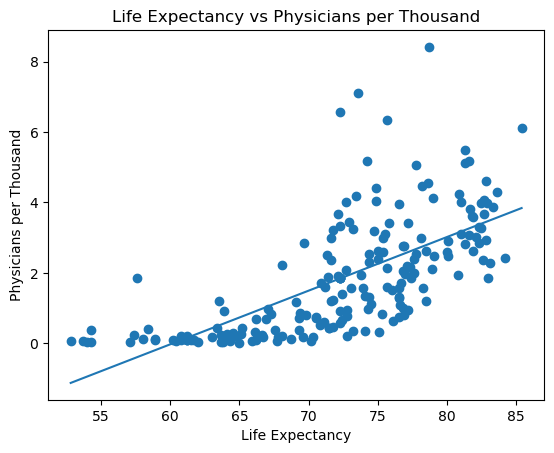

In [55]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Physicians per Thousand")
plt.xlabel("Life Expectancy")
plt.ylabel("Physicians per Thousand")
plt.scatter(life_expectancy, physicians_per_thousand)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, physicians_per_thousand, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Infant Mortality

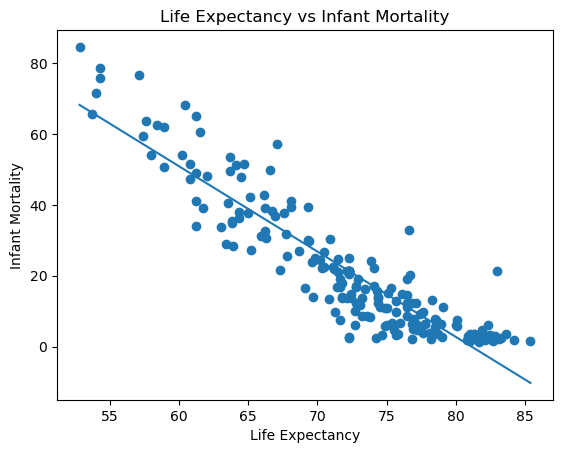

In [59]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Infant Mortality")
plt.xlabel("Life Expectancy")
plt.ylabel("Infant Mortality")
plt.scatter(life_expectancy, infant_mortality)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, infant_mortality, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Maternal Mortality Ratio

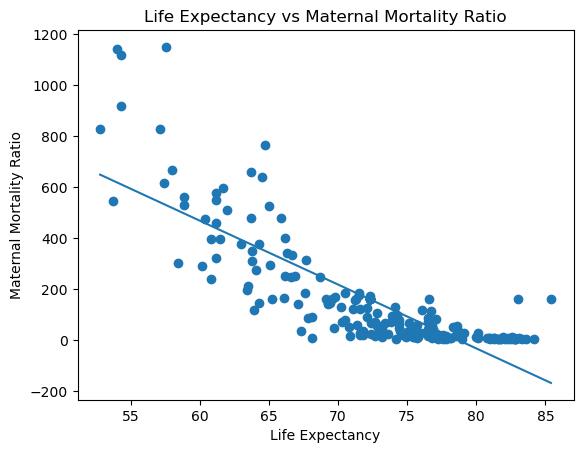

In [63]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Maternal Mortality Ratio")
plt.xlabel("Life Expectancy")
plt.ylabel("Maternal Mortality Ratio")
plt.scatter(life_expectancy, maternal_mortality_ratio)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, maternal_mortality_ratio, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Out of Pocket Expenditure

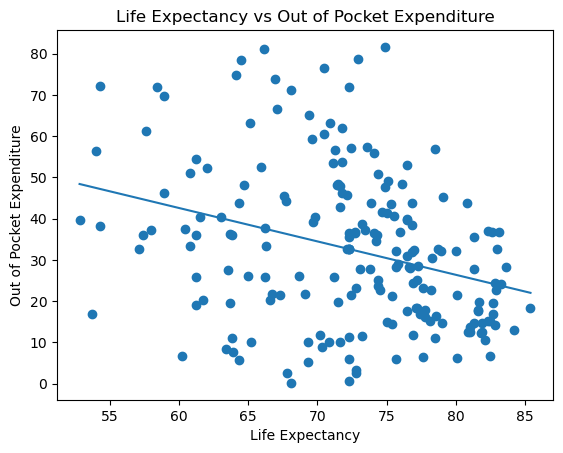

In [66]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Out of Pocket Expenditure")
plt.xlabel("Life Expectancy")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(life_expectancy, out_of_pocket_expenditure)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, out_of_pocket_expenditure, 1))(np.unique(life_expectancy)))

### Life Expectancy vs CO2 Emissions

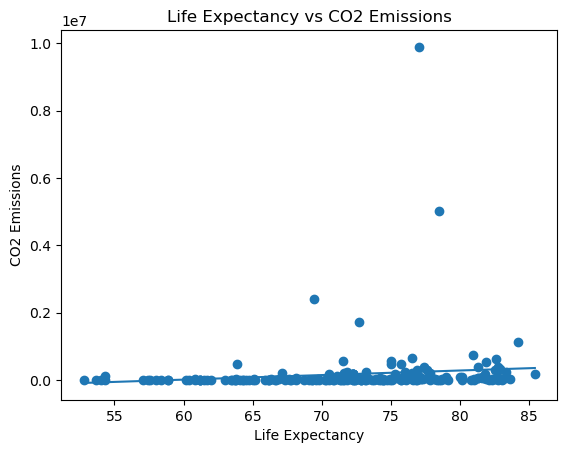

In [74]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs CO2 Emissions")
plt.xlabel("Life Expectancy")
plt.ylabel("CO2 Emissions")
plt.scatter(life_expectancy, co2_emissions)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, co2_emissions, 1))(np.unique(life_expectancy)))

### 5. Normalisation

### 6. Weighting and Aggregation

### 7. Uncertainty and Sensitivity Analysis

### 8. Back to the Data

### 9. Links to other Indicators

### 10. Visualisation of the Results